In [1]:
from google.colab import files
files.upload()

Saving SalesData.csv to SalesData.csv


{'SalesData.csv': b'Temperature,Revenue\r\n24.56688442,534.7990284\r\n26.00519115,625.1901215\r\n27.79055388,660.6322888\r\n20.59533505,487.7069603\r\n11.50349764,316.2401944\r\n14.35251388,367.9407438\r\n13.70777988,308.8945179\r\n30.83398474,696.7166402\r\n0.976869989,55.39033824\r\n31.66946458,737.8008241\r\n11.45525338,325.9684084\r\n3.664669577,71.16015301\r\n18.81182403,467.4467066\r\n13.62450892,289.5409341\r\n39.53990899,905.4776043\r\n18.48314099,469.9090332\r\n25.93537514,648.2099977\r\n42.51528041,921.508275\r\n29.58948056,649.5611747\r\n21.77594799,534.6228653\r\n25.45783637,612.1539491\r\n15.21456942,353.3256334\r\n22.61931574,524.2361154\r\n16.25872074,374.231135\r\n23.88172478,523.1245467\r\n18.97830025,473.6043349\r\n15.6614643,402.4553204\r\n29.18504465,679.3177906\r\n19.02461092,517.5340283\r\n35.12015142,809.6720534\r\n24.18393726,528.3804165\r\n15.23119012,356.0980075\r\n8.790952808,237.7639106\r\n18.23322784,418.1372788\r\n35.62892497,809.4634112\r\n37.05754246,870

In [2]:
import pandas as pd


In [5]:
data = pd.read_csv("/content/SalesData.csv")

In [6]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


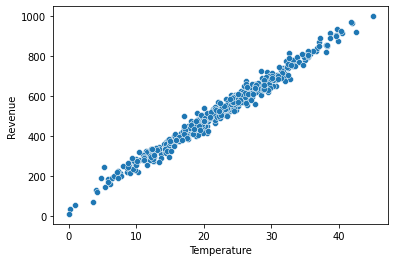

In [9]:
sns.scatterplot(data.Temperature, data.Revenue)

In [10]:
x_train = data.Temperature
y_train = data.Revenue

In [11]:
# Building a model in tensorflow 

import tensorflow as tf
from tensorflow.keras import layers

In [18]:
# model building

inputs = layers.Input(shape = (1,))
x = layers.Dense(1, activation= "linear")(inputs)

outputs = (x)

model = tf.keras.Model(inputs, outputs)


# compiling the model

model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.Adam(0.01)

)

# fitting the data to model

model_hist = model.fit(x_train, y_train, epochs = 300)


Epoch 1/300
16/16 [==============================] - 0s 1ms/step - loss: 281293.5938
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 277138.9688
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 273073.5000
Epoch 4/300
16/16 [==============================] - 0s 1ms/step - loss: 269026.2188
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 265040.8125
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 261062.0781
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 257136.9062
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 253312.3125
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 249433.4844
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 245724.3594
Epoch 11/300
16/16 [==============================] - 0s 2ms/step - loss: 241974.2500
Epoch 12/300
16/16 [==============================] - 0s 1ms/st

In [30]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_hist.history.keys()

dict_keys(['loss'])

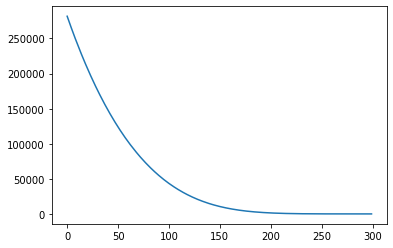

In [20]:
# plotting the loss 

import matplotlib.pyplot as plt

plt.plot(model_hist.history["loss"])


In [21]:
model.get_weights()

[array([[22.31168]], dtype=float32), array([22.175241], dtype=float32)]

In [29]:
temp = 10

predicted_revenue = model.predict([temp])

print(f"Predicted Revenue: {float(predicted_revenue): 0.2f}")

Predicted Revenue:  245.29
